# Notebook supporting feature engineering and eda of training set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df: pd.DataFrame = pd.read_csv('../data/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
train_df['LotFrontage'] = train_df['LotFrontage'].fillna(-1)
train_df['GarageYrBlt'] = train_df['GarageYrBlt'].fillna(-1)
train_df['MasVnrArea'] = train_df['MasVnrArea'].fillna(-1)

## Replace text content (string values) with numerical one

In [5]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
def replace_bins(columns: list[str], cols: list[str], new_col_suffix: str) -> None:
    for col in cols:
        columns.remove(col)
        columns.append(col + new_col_suffix)

final_columns = list(train_df.columns.copy())
len(final_columns)

81

In [7]:
for col in train_df.columns:
    if pd.api.types.is_string_dtype(train_df[col].dtype):
        factorized_column = col + '_fact'
        train_df[col + '_fact'] = pd.factorize(train_df[col])[0]
        replace_bins(final_columns, [col], '_fact')

train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageType_fact,GarageFinish_fact,GarageQual_fact,GarageCond_fact,PavedDrive_fact,PoolQC_fact,Fence_fact,MiscFeature_fact,SaleType_fact,SaleCondition_fact
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,1,1,0,0,0,-1,-1,-1,0,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,-1,-1,-1,0,0


In [8]:
len(final_columns)

81

## Group years into bins

##### Rationale:
###### Years close to each other are not important differentiator. Bins can provide real impact.

#### When houses and garages were built?

array([[<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'GarageYrBlt'}>,
        <AxesSubplot:title={'center':'YrSold'}>]], dtype=object)

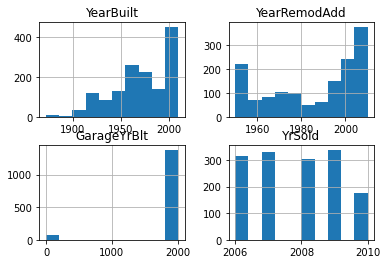

In [9]:
years_columns = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

train_df.hist(column=years_columns)

<AxesSubplot:>

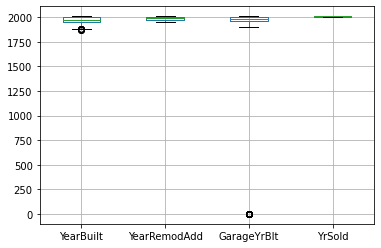

In [10]:
train_df.boxplot(column=years_columns)

##### Observations:
- There is no need to create bins from YrSold - values are too close to each other
- Most of the values are between 1960s and 2000s
- There are outliers, especially for YearBuilt

In [11]:
# Arbitrary bin values based on above plot. Could be calculated within deeper analysis

train_df['YearBuilt_bins'] = pd.qcut(train_df['YearBuilt'], q=10, labels=False, precision=0)
train_df['YearRemodAdd_bins'] = pd.qcut(train_df['YearRemodAdd'], q=8, labels=False, precision=0)
train_df['GarageYrBlt_bins'] = pd.qcut(train_df['GarageYrBlt'], q=8, labels=False, precision=0)
train_df['YrSold_bins'] = pd.qcut(train_df['YrSold'], q=4, labels=False, precision=0)

train_df[['YearBuilt', 'YearBuilt_bins', 'YearRemodAdd', 'YearRemodAdd_bins', 'GarageYrBlt', 'GarageYrBlt_bins', 'YrSold', 'YrSold_bins']].head()

,YearBuilt,YearBuilt_bins,YearRemodAdd,YearRemodAdd_bins,GarageYrBlt,GarageYrBlt_bins,YrSold,YrSold_bins
0,2003,7,2003,5,2003.0,6,2008,1
1,1976,5,1976,2,1976.0,3,2007,0
2,2001,7,2002,5,2001.0,5,2008,1
3,1915,0,1970,2,1998.0,5,2006,0
4,2000,7,2000,4,2000.0,5,2008,1


In [12]:
replace_bins(final_columns, years_columns, '_bins')

#### Lot, garage and other areas

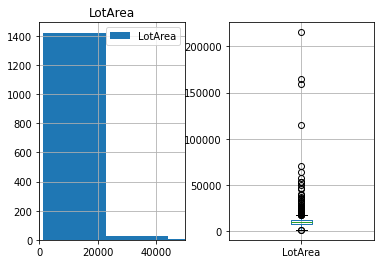

In [13]:
def plot_box_hist(feature: list[str], hist_xlim:int = 50000):
    fig, axes = plt.subplots(nrows=len(feature), ncols=2)
    train_df.hist(column=feature, legend=True, ax=axes[0])
    axes[0].set_xlim((0, hist_xlim))
    train_df.boxplot(column=feature, ax=axes[1])

plot_box_hist(['LotArea'])

<AxesSubplot:>

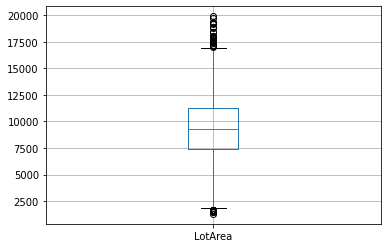

In [14]:
train_df[train_df['LotArea'] < 20000].boxplot(column=['LotArea'])

##### Observations:
- LotArea has a lot of outliers, especially within big areas
- There is clear set of values within similar range (below 12500)

In [15]:
train_df['LotArea_bins'] = pd.qcut(train_df['LotArea'], q=4, labels=False, precision=0)

train_df[['LotArea', 'LotArea_bins']].head()

,LotArea,LotArea_bins
0,8450,1
1,9600,2
2,11250,2
3,9550,2
4,14260,3


In [16]:
replace_bins(final_columns, ['LotArea'], '_bins')

<AxesSubplot:>

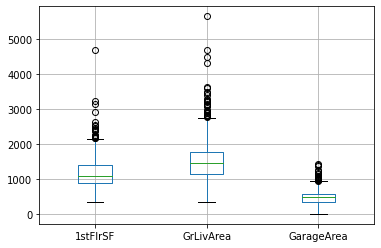

In [17]:
non_zero_area_columns = ['1stFlrSF', 'GrLivArea', 'GarageArea']

train_df.boxplot(column=non_zero_area_columns)

array([[<AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>],
       [<AxesSubplot:title={'center':'GarageArea'}>, <AxesSubplot:>]],
      dtype=object)

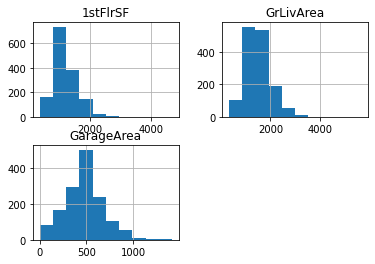

In [18]:
train_df.hist(column=non_zero_area_columns)

##### Observations:
- Again a lot of outliers
- There is clear set of values within similar range

In [19]:
train_df['1stFlrSF_bins'] = pd.qcut(train_df['1stFlrSF'], q=6, labels=False, precision=0)
train_df['GrLivArea_bins'] = pd.qcut(train_df['GrLivArea'], q=6, labels=False, precision=0)
train_df['GarageArea_bins'] = pd.qcut(train_df['GarageArea'], q=4, labels=False, precision=0)

train_df[['1stFlrSF', '1stFlrSF_bins', 'GrLivArea', 'GrLivArea_bins', 'GarageArea', 'GarageArea_bins']].head()

,1stFlrSF,1stFlrSF_bins,GrLivArea,GrLivArea_bins,GarageArea,GarageArea_bins
0,856,1,1710,4,548,2
1,1262,3,1262,2,460,1
2,920,1,1786,4,608,3
3,961,2,1717,4,642,3
4,1145,3,2198,5,836,3


In [20]:
replace_bins(final_columns, non_zero_area_columns, '_bins')

<AxesSubplot:>

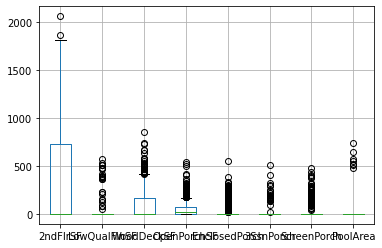

In [21]:
often_empty_columns = ['2ndFlrSF', 'LowQualFinSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']

train_df.boxplot(column=often_empty_columns)

array([[<AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>],
       [<AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'3SsnPorch'}>],
       [<AxesSubplot:title={'center':'ScreenPorch'}>,
        <AxesSubplot:title={'center':'PoolArea'}>, <AxesSubplot:>]],
      dtype=object)

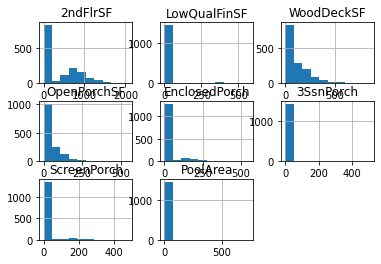

In [22]:
train_df.hist(column=often_empty_columns)

For column: 2ndFlrSF, intervals: [-1, 1, 109, 625, 776, 926, inf]
For column: LowQualFinSF, intervals: [-1, 1, 52, 168, 377, 477, inf]
For column: WoodDeckSF, intervals: [-1, 1, 11, 120, 171, 240, inf]
For column: OpenPorchSF, intervals: [-1, 1, 3, 39, 63, 112, inf]
For column: EnclosedPorch, intervals: [-1, 1, 18, 104, 144, 205, inf]
For column: 3SsnPorch, intervals: [-1, 1, 22, 150, 180, 239, inf]
For column: ScreenPorch, intervals: [-1, 1, 39, 143, 180, 224, inf]
For column: PoolArea, intervals: [-1, 1, 479, 515, 555, 612, inf]


<AxesSubplot:>

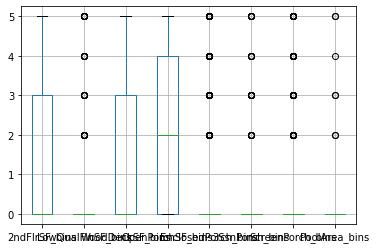

In [23]:
for col in often_empty_columns:
    counts = pd.qcut(train_df.loc[train_df[col] > 0][col], q=4).value_counts()

    bins_intervals = [-1, 1, np.inf]
    for interval in counts.index:
        bins_intervals.append((int(interval.left)))

    intervals_sorted = sorted(bins_intervals)
    print(f'For column: {col}, intervals: {intervals_sorted}')

    train_df[col + '_bins'] = pd.cut(train_df[col], bins=intervals_sorted, labels=list(range(6))).cat.codes

train_df.boxplot([c + '_bins' for c in often_empty_columns])

##### Observations
- A lot of zeroes, so cut should be used instead of qcut; qcut is to calculate intervals
- For few features columns are mostly 0 - should be checked if columns can be dropped
- Experiment could be done to replace some categories with boolean output (zero & non-zero)

In [24]:
replace_bins(final_columns, often_empty_columns, '_bins')

## Description of already numeric features

In [25]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GrLivArea_bins,GarageArea_bins,2ndFlrSF_bins,LowQualFinSF_bins,WoodDeckSF_bins,OpenPorchSF_bins,EnclosedPorch_bins,3SsnPorch_bins,ScreenPorch_bins,PoolArea_bins
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.445890,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.111644,443.639726,...,2.497945,1.475342,1.511644,0.062329,1.668493,1.912329,0.497945,0.056849,0.273973,0.016438
std,421.610009,42.300571,34.960241,9981.264932,1.382997,1.112799,30.202904,20.645407,180.734517,456.098091,...,1.709746,1.110148,1.883299,0.487913,1.904785,1.919700,1.292408,0.462642,0.981812,0.250572
min,1.000000,20.000000,-1.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,4.000000,2.000000,3.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


##### Observations
- Quite a lot of outliers, especially on max side (more on this below)
- TODO Values on different scales
- TODO Remove id from further calculations

In [26]:
final_columns_df = train_df[final_columns].copy()
final_columns_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MiscVal',
       'MoSold', 'SalePrice', 'MSZoning_fact', 'Street_fact', 'Alley_fact',
       'LotShape_fact', 'LandContour_fact', 'Utilities_fact', 'LotConfig_fact',
       'LandSlope_fact', 'Neighborhood_fact', 'Condition1_fact',
       'Condition2_fact', 'BldgType_fact', 'HouseStyle_fact', 'RoofStyle_fact',
       'RoofMatl_fact', 'Exterior1st_fact', 'Exterior2nd_fact',
       'MasVnrType_fact', 'ExterQual_fact', 'ExterCond_fact',
       'Foundation_fact', 'BsmtQual_fact', 'BsmtCond_fact',
       'BsmtExposure_fact', 'BsmtFinType1_fact', 'BsmtFinType2_fact',
       'Heating_fact', 'HeatingQC_fact', 'CentralAir_fact', 'Electrical_fact',
       'KitchenQual_fact', 'Functional_fact', 'FireplaceQu

In [27]:
for col in final_columns_df.columns:
    if pd.api.types.is_string_dtype(final_columns_df[col].dtype):
        continue

    lot_std = final_columns_df[col].std()
    lot_mean = final_columns_df[col].mean()

    # three might be industry recommendation: https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
    cut_off = lot_std * 3
    lower, upper = lot_mean - cut_off, lot_mean + cut_off

    outliers = [x for x in final_columns_df[col] if x < lower or x > upper]
    print(f'For {col} identified outliers: {len(outliers)}')

For Id identified outliers: 0
For MSSubClass identified outliers: 30
For LotFrontage identified outliers: 6
For OverallQual identified outliers: 2
For OverallCond identified outliers: 28
For MasVnrArea identified outliers: 32
For BsmtFinSF1 identified outliers: 6
For BsmtFinSF2 identified outliers: 50
For BsmtUnfSF identified outliers: 11
For TotalBsmtSF identified outliers: 10
For BsmtFullBath identified outliers: 16
For BsmtHalfBath identified outliers: 82
For FullBath identified outliers: 0
For HalfBath identified outliers: 12
For BedroomAbvGr identified outliers: 14
For KitchenAbvGr identified outliers: 68
For TotRmsAbvGrd identified outliers: 12
For Fireplaces identified outliers: 5
For GarageCars identified outliers: 0
For MiscVal identified outliers: 8
For MoSold identified outliers: 0
For SalePrice identified outliers: 22
For MSZoning_fact identified outliers: 81
For Street_fact identified outliers: 6
For Alley_fact identified outliers: 41
For LotShape_fact identified outliers:

# Nulls and uniqueness

In [28]:
final_columns_df.isnull().sum()

Id                    0
MSSubClass            0
LotFrontage           0
OverallQual           0
OverallCond           0
                     ..
OpenPorchSF_bins      0
EnclosedPorch_bins    0
3SsnPorch_bins        0
ScreenPorch_bins      0
PoolArea_bins         0
Length: 81, dtype: int64

In [29]:
final_columns_df.nunique()

Id                    1460
MSSubClass              15
LotFrontage            111
OverallQual             10
OverallCond              9
                      ... 
OpenPorchSF_bins         5
EnclosedPorch_bins       5
3SsnPorch_bins           5
ScreenPorch_bins         5
PoolArea_bins            5
Length: 81, dtype: int64

##### Observations
- Safe number of outliers vary from 0 to 98 (standard deviation value * 3)

## Correlation between features

In [30]:
# Pearson correlation
#   0.3 to 0.5 - weak correlation
#   0.5 to 0.7 - moderate correlation
#   0.7 to 0.9 - strong correlation
#   0.9 to 1 - very strong correlation

corr: pd.DataFrame = final_columns_df.corr()
corr.style.format('{:.2}').background_gradient(cmap=plt.get_cmap('coolwarm'))

In [31]:
for col in final_columns_df.columns:
    if col in corr:
        col_sorted = corr[col].sort_values(ascending=False)
        print(f'Highest correlation for {col} is {col_sorted[1]}, for column= {col_sorted.index[1]}')

Highest correlation for Id is 0.06650900950191323, for column= PoolQC_fact
Highest correlation for MSSubClass is 0.7708396619425061, for column= BldgType_fact
Highest correlation for LotFrontage is 0.23636163228406107, for column= TotalBsmtSF
Highest correlation for OverallQual is 0.7909816005838053, for column= SalePrice
Highest correlation for OverallCond is 0.22791158639694706, for column= Foundation_fact
Highest correlation for MasVnrArea is 0.47258505969479003, for column= SalePrice
Highest correlation for BsmtFinSF1 is 0.6492117535742649, for column= BsmtFullBath
Highest correlation for BsmtFinSF2 is 0.7351647961785289, for column= BsmtFinType2_fact
Highest correlation for BsmtUnfSF is 0.4153596051815893, for column= TotalBsmtSF
Highest correlation for TotalBsmtSF is 0.7146671373714307, for column= 1stFlrSF_bins
Highest correlation for BsmtFullBath is 0.6492117535742649, for column= BsmtFinSF1
Highest correlation for BsmtHalfBath is 0.1190481678808047, for column= BsmtFinType2_fa

##### Observations
- There are already high correlation between some features (like MSSubClass & BldgType_fact)
- Come correlations are between classes that are variants of each other (with bins and without); it should be limited by keeping only one version of feature
- TODO take default values, missing values into account. Should they be dropped?
